In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
data_dir = '../data/data-alice-schrank-2'
data = {}
for idx, uuid in enumerate(os.scandir(data_dir)):
    #print(uuid.name)
    data[uuid.name] = {}
    data[uuid.name]['alice'] = {}
    data[uuid.name]['bob'] = {}
    for path, _, files in os.walk(os.path.join(data_dir, uuid.name)):
        if len(files) != 1:
            continue
        json = pd.read_json(os.path.join(path, files[0]), typ='series')
        from_, to_ = path.split('/')[-2:]
        data[uuid.name][from_][to_] = json
#print(data)

In [3]:
rtt = pd.DataFrame()
DELAY = "Round trip time of the channel estimation in µs"
DELAY_MS = "Round trip time of the channel estimation in ms"

for value in data.values():
    # rtt = rtt.append({DELAY: value['bob']['eve']['timestamp'] - value['alice']['eve']['timestamp']}, ignore_index=True)
    rtt = pd.concat([rtt, pd.DataFrame.from_records([{DELAY: value['bob']['eve']['timestamp'] - value['alice']['eve']['timestamp']}])])
    
rtt[DELAY_MS] = rtt[DELAY] / 1000.0

In [4]:
average = sum(rtt[DELAY_MS]) / len(rtt)
average

2.4687487562189054

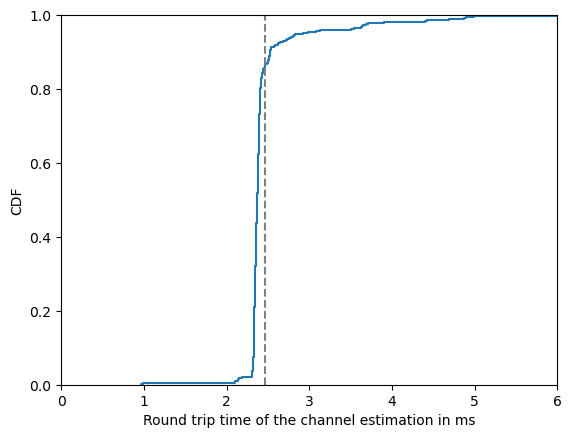

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.ecdfplot(data=rtt, x=DELAY_MS, ax=ax)
#ax.add_line(mlines.Line2D([average,0], [average, 1], color='red'))
plt.axvline(x=average, color='grey', linestyle='--')
ax.set_xlim(0,6)
ax.set_ylabel('CDF')
plt.savefig('rtt.pdf', bbox_inches='tight')

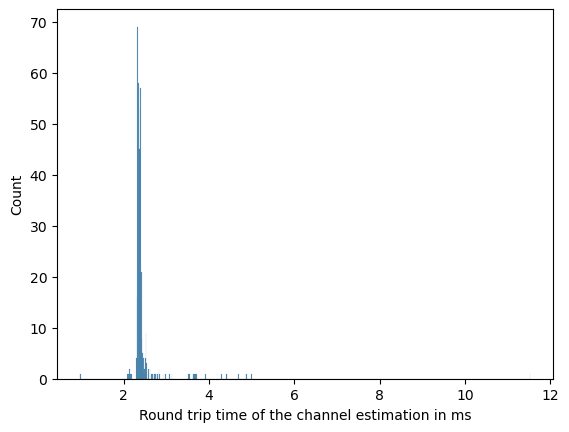

In [6]:
ax = sns.histplot(data=rtt, x=DELAY_MS)


In [7]:
min(rtt[DELAY_MS])

0.965

In [8]:
max(rtt[DELAY_MS])

11.534